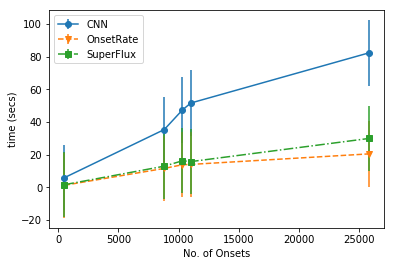

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import itertools

#Themes
#Themes
# plt.style.use('seaborn')



# SMALL_SIZE = 10
# MEDIUM_SIZE = 12
# BIGGER_SIZE = 13

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

df = pd.read_csv("runningTime.csv")

def plotTime(algorithm, lineStyle="", marker=""):
    alg = df.loc[df['Algorithm'] == algorithm]

    x = alg["Onsets"]
    y = alg["Time"]

    lists = sorted(itertools.izip(*[x, y]))
    new_x, new_y = list(itertools.izip(*lists))

    plt.errorbar(new_x, new_y, yerr=20, linestyle=lineStyle, marker=marker, label=algorithm)
    
    return new_x
        
plotTime("CNN", lineStyle='-', marker='o')
plotTime("OnsetRate", lineStyle='--', marker='v')
new_x = plotTime("SuperFlux", lineStyle='-.', marker='s')

labels = ["Modal", "ENST-1", "ENST-2", "ENST-3", "JKU"]

plt.xlabel("No. of Onsets")
plt.ylabel("time (secs)")

plt.savefig('fig.png', format='png', dpi=1000)
# plt.xticks(new_x, labels, rotation=50)
plt.legend()
plt.show()

[0.039434235422707714, 0.12567435573200531, 1.1014692030752535, 0.13515035451302973, 0.4525279066574075]
[0.25147362355255976, 0.37352453292171489, 0.15762895520847758, 0.42854515032494894, 0.55800854869275429]
[0.1545358403426208, 0.30456995469127474, 1.6198907132151541, 0.51835996101615367, 0.68840376538238068]


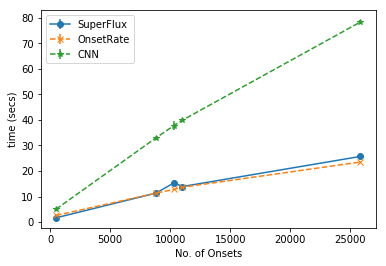

In [3]:
from scipy import stats

df2 = pd.read_csv("result.csv", names=["Algorithm","Dataset", "Onsets", "Time"])

algorithms = ["OnsetRate", "SuperFlux"]
datasets = ["Modal", "ENST-1", "ENST-2", "ENST-3", "JKU"]
    
def plotTime(algorithm, lineStyle="", marker=""):
    algDf = df2[df2["Algorithm"] == algorithm]
    
    xs = []
    ys = []
    errors = []
    
    for dataset in datasets:
        tempDf = algDf[algDf["Dataset"] == dataset]
    
        x = int(tempDf.iloc[0]["Onsets"])
        y = np.mean(tempDf["Time"])
        error = np.std(tempDf["Time"])
#         error = stats.sem(tempDf["Time"])
        
        xs.append(x)
        ys.append(y)
        errors.append(error)
        
        
    print(errors)
    plt.errorbar(xs, ys, yerr=errors, linestyle=lineStyle, marker=marker, label=algorithm)
    
plotTime("SuperFlux", lineStyle='-', marker='o')
plotTime("OnsetRate", lineStyle='--', marker='x')
plotTime("CNN", lineStyle='--', marker='*')

plt.xlabel("No. of Onsets")
plt.ylabel("time (secs)")
plt.legend()

plt.savefig("onset_running_times.pdf", bbox_inches='tight', dpi=1200)
# plt.xticks(new_x, labels, rotation=50)

plt.show()
        